Accuracy: 0.6710
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.58      0.63      4720
           1       0.67      0.75      0.71      5280

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

ROC-AUC: 0.7124


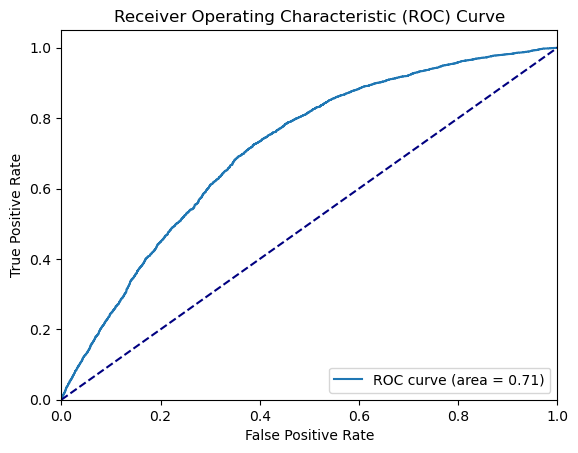

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 读取数据
file_path = 'churnnotclean.csv'
df = pd.read_csv(file_path)

# 处理缺失值，用平均值填充
imputer = SimpleImputer(strategy='mean')
df[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 
    'trips_in_first_30_days', 'weekday_pct']] = imputer.fit_transform(df[['avg_dist', 'avg_rating_by_driver', 
                                                                          'avg_rating_of_driver', 'avg_surge', 
                                                                          'surge_pct', 'trips_in_first_30_days', 
                                                                          'weekday_pct']])

# 编码类别变量
df['city'] = LabelEncoder().fit_transform(df['city'])
df['phone'] = LabelEncoder().fit_transform(df['phone'])
df['luxury_car_user'] = df['luxury_car_user'].astype(int)

# 特征矩阵 X 和目标向量 y
X = df.drop(columns=['Unnamed: 0', 'last_trip_date', 'signup_date', 'churn'])
y = df['churn']

# 数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 构建MLP分类器
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# 模型预测
y_pred = mlp.predict(X_test)
y_pred_prob = mlp.predict_proba(X_test)[:, 1]

# 模型评估
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# 打印评估指标
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', classification_rep)
print(f'ROC-AUC: {roc_auc:.4f}')

# 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

